<h2><center>Artificial Intelligence, Assignment 2</center></h2>

<h3><center>Search agents</center></h3>

<img src='imageAIAssignment002.jpeg' width="400" height="400">


__Total:__ 27pts + 5pts

__Given date:__ Tuesday September 28

__Due date:__ Friday October 15

### Question 1. A story of robots and batteries 

##### (15pts + 2pts)

We consider the simple 12$\times$12 world depicted below. In this first exercise, we will study the behavior of an agent that can only see the immediately adjacent cells (that is it only sees the cells that are directly in front, behind, or on its left/right). Your agent is a simple robot that enters the maze from the bottom left cell and must reach the exit which is located on the uppermost rightmost cell. 


<img src='MAZE002.png' width="400" height="400">

<p style="margin-bottom:1cm;"></p>

The objective of the agent is twofold:

   - 1) It has to find the exit (In a first approach, we won't take any step cost into account), while avoiding all the holes.

   - 2) It has to collect all the batteries.



##### Question 1.1. (5pts) A simple reflex agent 

Using a simple while loop and follow the ideas discussed during the recitations to code a simple reflex agent that achieves this objective. When the agent faces a pit, it should avoid it. When the agent is on a cell containing a battery, it should collect it. Finally the agent can only move in the four immediately adjacent cells to its current position. When it sees no pit and there are no batteries in any of the adjacent cells, it should move at random. Consider adding on the order of 14 batteries and 18 holes (first manually, then at random) 


In [14]:
# put your solution here
import numpy as np

def init_maze(maze_size=12):
    maze = np.zeros((maze_size, maze_size))
    batteries = [[11, 0],
                 [6, 10],
                 [11, 7],
                 [0, 4],
                 [3, 3],
                 [7, 9],
                 [1, 1],
                 [3, 8],
                 [11, 7],
                 [4, 0],
                 [1, 8],
                 [7, 1],
                 [4, 7],
                 [11, 1]]   # manually

    i = 0
    holes = []
    while i < 18:  # random
        pos = list(np.random.randint(0, maze_size, size=(2)))
        if pos in batteries or pos == [0, 0] or pos == [maze_size-1, maze_size-1]:
            continue
        else:
            holes.append(pos)
            i = i + 1

    for (r, c) in batteries: # 1 for batteries
        maze[r][c] = 1

    for (r, c) in holes:     # -1 for batteries
        maze[r][c] = -1
    
    return maze, batteries, holes


def agent_search(maze, batteries_position, holes_position):
    maze_size = len(maze)
    batteries_num = len(batteries_position)
    holes_num = len(holes_position)
    
    start_position = [0, 0]
    exit_position = [maze_size-1, maze_size-1]
    current_position = start_position.copy()
    
    move = [[1, 0], [-1, 0], [0, 1], [0, -1]] # up, down, right, lef
    
    collected_batteries = []
    un_collected_batteries = batteries_position.copy()
    search_path = [start_position]
    
    while True:
        if len(un_collected_batteries) == 0 and current_position == exit_position:
            return search_path
        
        if current_position in un_collected_batteries:
            collected_batteries.append(current_position)
            un_collected_batteries.remove(current_position)
            
        random_direction_index = np.random.randint(0, len(move))
        random_direction = move[random_direction_index]
        
        next_position = [current_position[0] + random_direction[0], current_position[1] + random_direction[1]]
        if (next_position[0] < 0) or (next_position[1] < 0) or (next_position[0] >= maze_size) or (next_position[1] >= maze_size):
            continue
        if next_position in holes_position:
            continue
        
        current_position = next_position.copy()
        search_path.append(current_position)

In [15]:
maze_size = 12
maze, batteries_position, holes_position = init_maze(maze_size)
search_path = agent_search(maze, batteries_position, holes_position)

##### Question 1.2. (5pts) Search agent

We will now assume that our agent has a map of the world. On top of the pits from above, the world now also contains walls, which are additional obstacles in the search for the exit.

Solve the problem using Breadth First search. The children of a node are given by the adjacent cells. Once you have the path to a battery, stores it. Then continue BFS from the location of this battery and store your second path,.... Proceed like this until you have all the batteries. From the last battery find the exit.  

<img src='Maze003.png' width="400" height="400">

<p style="margin-bottom:1cm;"></p>



In [3]:
# put your code here
import numpy as np

def init_maze_wall(maze_size=12):
    maze = np.zeros((maze_size, maze_size))
    batteries = [[11, 0],
                 [6, 10],
                 [11, 7],
                 [0, 4],
                 [3, 3],
                 [7, 9],
                 [1, 1],
                 [3, 8],
                 [11, 7],
                 [4, 0],
                 [1, 8],
                 [7, 1],
                 [4, 7],
                 [11, 1]]   # manually

    i = 0
    holes = []
    while i < 18:  # random
        pos = list(np.random.randint(0, maze_size, size=(2)))
        if pos in batteries or pos == [0, 0] or pos == [maze_size-1, maze_size-1]:
            continue
        else:
            holes.append(pos)
            i = i + 1
    
    i = 0
    walls = []
    while i < 5:  # random
        pos = list(np.random.randint(0, maze_size, size=(2)))
        if pos in batteries or pos in holes or pos == [0, 0] or pos == [maze_size-1, maze_size-1]:
            continue
        else:
            walls.append(pos)
            i = i + 1
    
    for (r, c) in batteries: # 1 for batteries
        maze[r][c] = 1

    for (r, c) in holes:     # -1 for batteries
        maze[r][c] = -1
    
    for (r, c) in walls:     # -2 for batteries
        maze[r][c] = -2
        
    return maze, batteries, holes, walls
    

def agent_search_BFS(maze, batteries_position, holes_position, walls_position):
    maze_size = len(maze)
    batteries_num = len(batteries_position)
    holes_num = len(holes_position)
    walls_num = len(walls_position)
    
    start_position = [0, 0]
    exit_position = [maze_size-1, maze_size-1]
    
    move = [[1, 0], [-1, 0], [0, 1], [0, -1]] # up, down, right, lef
    
    collected_batteries = []
    un_collected_batteries = batteries_position.copy()
    search_path = []
    
    while True:
        explored = []
        queue = [[start_position]]
    
        if len(un_collected_batteries) == 0 and current_position == exit_position:
            break
            
        while queue:
            path = queue.pop(0)
            current_position = path[-1]

            if current_position not in explored:
                if current_position in un_collected_batteries:
                    collected_batteries.append(current_position)
                    un_collected_batteries.remove(current_position)
                    search_path.append(path)
                    start_position = current_position.copy()
                    break
                
                if len(un_collected_batteries) == 0 and current_position == exit_position:
                    search_path.append(path)
                    break
                
                neighbours = []
                for m in move:
                    next_position = [current_position[0] + m[0], current_position[1] + m[1]]
                    if (next_position[0] < 0) or (next_position[1] < 0) or (next_position[0] >= maze_size) or (next_position[1] >= maze_size):
                        continue
                    if next_position in holes_position:
                        continue
                    if next_position in walls_position:
                        continue
                    neighbours.append(next_position)

                for neighbour in neighbours:
                    if neighbour not in explored:
                        new_path = list(path)
                        new_path.append(neighbour)
                        queue.append(new_path)

                explored.append(current_position)
    
    return search_path

In [4]:
maze_size = 12
maze, batteries_position, holes_position, walls_position = init_maze_wall(maze_size)
search_path = agent_search_BFS(maze, batteries_position, holes_position, walls_position)

##### Question 1.3. (5pts) Informed search agent

In this third question, we will use an informed search strategy to improve our agent. We want to use as our heuristic the $\ell_1$ distance to the closest battery that has not been picked. Code a Best First Search agent whose heuristic changes as it picks up new batteries. As soon as it picked up the last battery, the heuristic becomes the $\ell_1$ distance to the exit. You can assume that the cells have unitary side length. Also recall that the $\ell_1$ distance is given by $\|\boldsymbol x_1 - \boldsymbol x_2\|_1 = |x_{11} - x_{21}| + |x_{12} - x_{22}|$ where $\boldsymbol x_1 = (x_{11}, x_{12})$, $\boldsymbol x_{2} = (x_{21}, x_{22})$.    


<img src='Maze003.png' width="400" height="400">

<p style="margin-bottom:1cm;"></p>



In [5]:
def compute_l1distance(current_position, objective_position):
    return abs(current_position[0] - objective_position[0]) + abs(current_position[1] - objective_position[1])

def select_closest_battery(current_position, un_collected_batteries):
    min_dist = 1e6
    closest_battery = []
    
    for battery_position in un_collected_batteries:
        dist = compute_l1distance(current_position, battery_position)
        if dist < min_dist:
            min_dist = dist
            closest_battery = battery_position
            
    return closest_battery, min_dist
        
def informed_agent_search_BFS(maze, batteries_position, holes_position, walls_position):
    maze_size = len(maze)
    batteries_num = len(batteries_position)
    holes_num = len(holes_position)
    walls_num = len(walls_position)
    
    start_position = [0, 0]
    exit_position = [maze_size-1, maze_size-1]
    
    move = [[1, 0], [-1, 0], [0, 1], [0, -1]] # up, down, right, lef
    
    collected_batteries = []
    un_collected_batteries = batteries_position.copy()
    search_path = []
    current_position = start_position
    i = 0

    while True:
        explored = []
        bad_position = []
        queue = [start_position]
    
        if len(un_collected_batteries) == 0 and current_position == exit_position:
            break
        
        while True:
            min_distance = 1e6
            current_position = queue[-1]

            if current_position not in explored:
                if current_position in un_collected_batteries:
                    collected_batteries.append(current_position)
                    un_collected_batteries.remove(current_position)
                    search_path.append(queue)
                    start_position = current_position.copy()
                    break

                if len(un_collected_batteries) == 0 and current_position == exit_position:
                    search_path.append(queue)
                    break

                for m in move:
                    next_position = [current_position[0] + m[0], current_position[1] + m[1]]
                    if (next_position[0] < 0) or (next_position[1] < 0) or (next_position[0] >= maze_size) or (next_position[1] >= maze_size):
                        continue
                    if next_position in holes_position:
                        continue
                    if next_position in walls_position:
                        continue
                    if next_position in explored:
                        continue
                    if next_position in bad_position:
                        continue
                    
                    if len(un_collected_batteries) == 0:
                        distance = compute_l1distance(next_position, exit_position)
                    else:
                        closest_battery, distance = select_closest_battery(next_position, un_collected_batteries)
                        
                    if distance < min_distance:
                        min_distance = distance
                        temp_position = next_position
                
                if min_distance == 1e6:
                    bad_position.append(queue.pop())
                    explored.pop()
                    continue
                    
                queue.append(temp_position)             
                explored.append(current_position)
    
    return search_path

In [6]:
maze_size = 12
maze, batteries_position, holes_position, walls_position = init_maze_wall(maze_size)
search_path = informed_agent_search_BFS(maze, batteries_position, holes_position, walls_position)

##### Bonus (2pts) 
Generate and display the movie of the search for each of the questions above. 

In [7]:
# put your code here
pass

### Question 2. Rook Jumping

##### (12pts + 3pts)

In this second question, we consider a "rook jumping" maze. An example of such a maze is given below (the starting position is shown in red and the goal position is shown in green). 



<img src='RookMaze001.png' width="350" height="350">

Each state in the maze has an associated jump number that provides the exact number of cells one may move horizontally or vertically in a straight line to change state. As an example, in the maze above, the first move may either be 2 cells on the right of (0,0) or 2 cells down to (2,0).

#### Question 2.1. Generate the maze (2pts)

Start by completing the function Maze_generation which takes as argument the dimension of the maze as well as a maximum jump number (don't take it much larger than n/2) and returns a matrix of random integers between 0 and the maximum jump length. 

In [8]:
import numpy as np

def Maze_generation(n):
    
    '''function should return a random maze'''
    maze_size = n
    maximum_jump_number = n  # much larger than n/2 ?
    
#     maze = [[np.random.randint(0, maximum_jump_number) for i in range(maze_size)] for j in range(maze_size)]
    maze = np.random.randint(0, maximum_jump_number, size=(maze_size, maze_size))
    
    startPosition = (0, 0)
    goalPosition = (maze_size-1, maze_size-1)
    
    maze[startPosition[0]][startPosition[1]] = np.random.randint(1, maximum_jump_number)
    maze[goalPosition[0]][goalPosition[1]] = 0  # need?
    
    return maze

You can use the lines below to display your maze

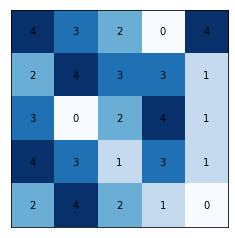

In [9]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

min_val, max_val = 0, 5

intersection_matrix = np.random.randint(0, 5, size=(max_val, max_val))

ax.matshow(intersection_matrix, cmap=plt.cm.Blues)

for i in range(max_val):
    for j in range(max_val):
        c = intersection_matrix[j,i]
        ax.text(i, j, str(c), va='center', ha='center')
        
        
ax.set_xticks([]) 
ax.set_xticklabels([]) 
ax.set_yticks([]) 
ax.set_yticklabels([]) 
plt.show()

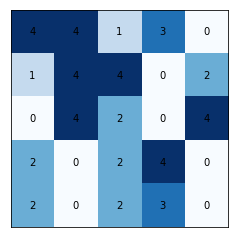

In [10]:
### display my maze

import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

n = 5

intersection_matrix = Maze_generation(n)

ax.matshow(intersection_matrix, cmap=plt.cm.Blues)

for i in range(n):
    for j in range(n):
        c = intersection_matrix[j,i]
        ax.text(i, j, str(c), va='center', ha='center')
        
        
ax.set_xticks([]) 
ax.set_xticklabels([]) 
ax.set_yticks([]) 
ax.set_yticklabels([]) 
plt.show()

##### Question 2.2. (5pts) Maze Evaluation

We now want to solve the maze (or equivalently, make sure it has a solution)  

Using _Breadth First Search_ (start with a reasonably small maze, e.g. 5 by 5), compute the minimum distance (depth number of moves) to each cell from the start cell (take the start cell to be the _uppermost leftmost_ cell). For this, keep track of a list of the depth distances to each node and update this list each time you encounter the corresponding node. Once BFS completed, return the minimum element from the list. 

Finally return the negative of the minimmum length of the path from the start to the goal and a large positive number (e.g. 1e6) if there is no such path.


In [11]:
def Maze_Evaluation(maze):
    
    '''The function takes a maze (random n x n array of integers)
    and should return the the minimum 
    distances of the start node to the goal'''
    
    
    # put your solution here
    def getNeighbors(maze, maze_size):

        def add(adj_list, a, b):
            adj_list.setdefault(a, []).append(b)

        adj_list = {}

        for r in range(maze_size):
            for c in range(maze_size):

                currentPosition = (r,c)

                key = str((r, c))
                moveWeight = maze[r][c]

                if moveWeight == 0:
                    adj_list.setdefault(key, [])
                    continue

                rightMoves = maze_size - c - 1
                leftMoves = c
                downMoves = maze_size - r - 1
                upMoves = r

                #right move
                if moveWeight <= rightMoves and rightMoves > 0:
                    neighbour = (r, c + moveWeight)
                    add(adj_list, key, str(neighbour))

                #left move
                if moveWeight <= leftMoves and leftMoves > 0:
                    neighbour = (r, c - moveWeight)
                    add(adj_list, key, str(neighbour))

                #down move
                if moveWeight <= downMoves and downMoves > 0:
                    neighbour = (r + moveWeight, c)
                    add(adj_list, key, str(neighbour))

                #right move
                if moveWeight <= upMoves and upMoves > 0:
                    neighbour = (r - moveWeight, c)
                    add(adj_list, key, str(neighbour))

        return adj_list
    
    maze_size = len(maze)
    distance = [[1e6 for i in range(maze_size)] for j in range(maze_size)]
    adj_list = getNeighbors(maze, maze_size)
    
    startPosition = str((0, 0))
    goalPosition = str((maze_size-1, maze_size-1))

    # BFS
    explored = []
    queue = [[startPosition]]

    if startPosition == goalPosition:
        return 0

    while queue:
#         print('Search path:', queue)
        path = queue.pop(0)
        node = path[-1]
#         print('Current path:', path)
#         print('Current Node:', node)
        
        
        if node not in explored and node in adj_list.keys():
            neighbours = adj_list[node]
#             print('Neighbours:', neighbours)
            
            for neighbour in neighbours:
                if neighbour not in explored:
                    new_path = list(path)
                    new_path.append(neighbour)
                    queue.append(new_path)
#                     print('New path:', new_path)
                     
            explored.append(node)
            
            dist = len(path) - 1
            r, c = eval(node)
            distance[r][c] = dist
#             print('Distance:', dist)
#             print('*****************************************')
    
    dist_start2Goal = distance[maze_size-1][maze_size-1]
    dist_start2Goal = -dist_start2Goal if dist_start2Goal != 1e6 else dist_start2Goal
    
    return dist_start2Goal

##### Question 2.3. (5pts) Stochastic local search (Hill climbing)

Now that we have a way of representing each maze, we will try to improve our maze with a stochastic local search. In this question, each state in our graph will encode a whole maze. Our local search algorithm will work as follows

- For a random, non goal cell, change the jump number to a different random legal jump number

- Re-evaluate the start to goal distance according to the _Maze_Evaluation_ function that you implemented in Question 2.2.

- If the objective function has not increased, accept the change and store the new maze if its evaluation is the best evaluated so far. Otherwise, reject the change and revert the cell to its previous jump number

Perform a few iterations of Stochastich HC and return the RJM with the best (minimum) objective function

In [12]:
def Maze_improvement(maze_init, maxIter):
    
    '''The function takes an initial Rook Jumping maze and 
    a maximum number of iterations as an input and returns 
    the improvement of the original maze obtained 
    through maxIter iteration of Stochastic Hill Descent'''
    
    
    # put your code here
    best_score = Maze_Evaluation(maze_init)
    best_maze = maze_init.copy()
    maze_size = len(maze_init)
    
    for i in range(maxIter):
        while True:
            random_cell = np.random.randint(0, maze_size, size=(2))
            if tuple(random_cell) == (maze_size-1, maze_size-1):
                continue
            elif tuple(random_cell) == (0, 0):
                random_number = np.random.randint(1, maze_size)
                break
            else:
                random_number = np.random.randint(0, maze_size)
                break
        
        new_maze = best_maze.copy()
        new_maze[random_cell[0]][random_cell[1]] = random_number
        new_score = Maze_Evaluation(new_maze)
        if new_score <= best_score:
            best_score = new_score
            best_maze = new_maze.copy()
    
    return best_maze

##### Bonus (3pts) Random Restart

One problem with pure hill descent is that stochastic local search may become trapped in local minima. A possible escape strategy is to restart the search periodically. Another way of viewing this is that we iteratively perform pure hill descent, starting each descent at a random state. The end result is the best result from all descents.

Add Random Restart to your 'Maze_improvement' function.

In [13]:
def Maze_improvement_RR(maze_init, max_iter_SHD, max_iter_RR):
    
    '''The function takes an initial (random) Rook Jumping maze and 
    a maximum number of iterations as an input and evaluates 
    the improvement of the original maze obtained 
    through max_iter_SHD iterations of Stochastic Hill Descent. 
    This process is repeated max_iter_RR times 
    (with different random initializations) and each of the 
    obtained solutions are stored. The max_iter_RR solutions are finally compared in 
    terms of the cost between the start and the goal node and 
    the best solution is returned as the final output'''
    
    
    # put your code here
    maze_size = len(maze_init)
    best_maze = maze_init.copy()
    best_score = Maze_Evaluation(maze_init)
 
    for i in range(max_iter_RR):
        random_maze = Maze_generation(maze_size)
        new_maze = Maze_improvement(random_maze, max_iter_SHD)
        new_score = Maze_Evaluation(new_maze)
        if new_score <= best_score:
            best_maze = new_maze.copy()
    
    return best_maze